## **Import Modules & Parameter Setting**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

N = 80        # total number of data points
M = 4       # number of basis functions
lam = 0.0     # regularization factor

N_train = 40  # number of training data 
N_val = 20    # number of validation data
N_test = N - N_train - N_val   # number of test data

## **Data generation** 

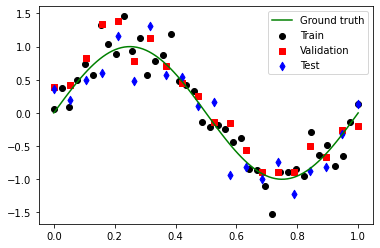

In [2]:
def generateTruth():
    x = np.linspace(0.0, 1.0, 100)
    t = np.sin(2 * np.pi * x)
    return (x,t)

def generateData(N, seed):
    np.random.seed(seed)
    x = np.linspace(0.0, 1.0, N)
    t = np.sin(2 * np.pi * x) + np.sqrt(0.05)*np.random.randn(x.size)
    return (x,t)
    
x_true, t_true = generateTruth()
x_train, t_train = generateData(N_train, 201812404)    ## insert your student ID
x_val, t_val = generateData(N_val, 0)                   ## FIXED SEED
x_test, t_test = generateData(N_test, 1)                ## FIXED SEED

plt.plot(x_true, t_true, 'g-')
plt.scatter(x_train, t_train, marker='o', c='k')
plt.scatter(x_val, t_val, marker='s', c='r')
plt.scatter(x_test, t_test, marker='d', c='b')
plt.legend(['Ground truth', 'Train', 'Validation', 'Test'])
plt.show()

## **Functions**

In [4]:
def phi(x, j):
    return x**j     ## polynomial basis function

def phi_n(x):
    return np.array([phi(x, j) for j in range(M)])

def computeDesignMatrix(x):
    Phi = np.zeros((x.size, M)) # Design matrix
    for n in range(x.size):
        Phi[n, :] = phi_n(x[n])
    return Phi

def predict(x, w):
    t = np.zeros((x.size,))
    for n in range(x.size):
        t[n] = np.matmul(w.T, phi_n(x[n]))
    return t

def computeError(x, t, w):
    E = 0
    for n in range(x.size):
        E += 1/(2*x.size)*(( t[n] - np.matmul(w.T, phi_n(x[n])) )**2)
    return E

def computeGradient(x, t, w):
    grad = 0
    for n in range(x.size):
        grad += -( t[n] - np.matmul(w.T, phi_n(x[n])) )*phi_n(x[n])
    return grad

def train(num_iter, eta, batch_size):
    ## batch_size == N_train: Gradient Descent
    ## batch_size == 1: Stochastic Gradient Descent
    
    w = 0.01*np.ones((M,))
    E_train, E_val = [], []
    train_time = []
    start_time = time.time()
    
    for tau in range(num_iter):
        B = np.random.choice(N_train, batch_size, replace=False)
        grad = computeGradient(x_train[B], t_train[B], w)
        w -= eta*grad
    
        train_time.append(time.time() - start_time)
        E_train.append(computeError(x_train, t_train, w))
        E_val.append(computeError(x_val, t_val, w))
        
    return w, E_train, E_val, train_time

def plotError(E_train, E_val, train_time):
    plt.plot(train_time, E_val, 'r:')
    plt.plot(train_time, E_train, 'b-')
    plt.legend(['Validation error', 'Train error'])
    plt.xlabel('time [sec]')
    plt.ylabel('Error')
    plt.show()

## **Least Sqaure**

In [5]:
Phi = computeDesignMatrix(x_train)

Phi_pinv = np.matmul(np.linalg.inv(np.matmul(Phi.T, Phi)), Phi.T)
w_LS = np.matmul(Phi_pinv, t_train)

print('Least square solution\n', w_LS)

E_LS_train = computeError(x_train, t_train, w_LS)
E_LS_val = computeError(x_val, t_val, w_LS)

print('Train error: %0.5f' % E_LS_train)
print('Validation error: %0.5f' % E_LS_val)

Least square solution
 [ -0.09324399  11.72076408 -34.37429749  22.90329641]
Train error: 0.02918
Validation error: 0.02436


## **Gradient Descent**

Training time: 89.69
GD solution
 [ -0.0798446   11.56103585 -33.98579545  22.650987  ]
Train error: 0.02919
Validation error: 0.02389


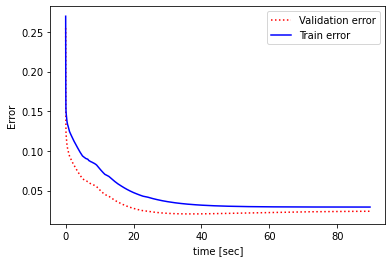

In [31]:
num_iter = 100000
eta = 0.01 # We need to change this
batch_size = N_train

w_GD, E_GD_train, E_GD_val, train_time = train(num_iter, eta, batch_size)

print('Training time: %0.2f' % train_time[-1])
print('GD solution\n', w_GD)
print('Train error: %0.5f' % E_GD_train[-1])
print('Validation error: %0.5f' % E_GD_val[-1])

plotError(E_GD_train, E_GD_val, train_time)

## **Stochastic Gradient Descent**

Training time: 40.55
SGD solution
 [  0.05986092  11.6079903  -34.39628686  22.94658824]
Train error: 0.03462
Validation error: 0.01889


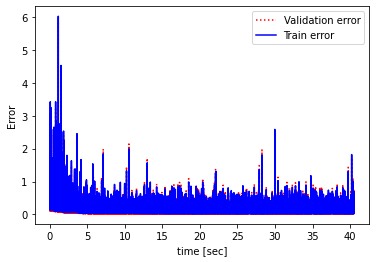

In [32]:
num_iter = 100000
eta = 0.6
batch_size = 1

w_SGD, E_SGD_train, E_SGD_val, train_time = train(num_iter, eta, batch_size)

print('Training time: %0.2f' % train_time[-1])
print('SGD solution\n', w_SGD)
print('Train error: %0.5f' % E_SGD_train[-1])
print('Validation error: %0.5f' % E_SGD_val[-1])

plotError(E_SGD_train, E_SGD_val, train_time)

## **Mini-Batch SGD**

Training time: 51.90
Mini-batch SGD solution
 [ -0.03415775  11.1833057  -33.19087092  22.13097364]
Train error: 0.02947
Validation error: 0.02303


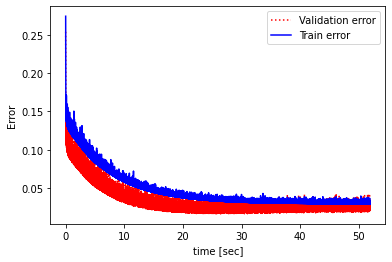

In [33]:
num_iter = 100000
eta = 0.03
batch_size = 10

w_MB, E_MB_train, E_MB_val, train_time = train(num_iter, eta, batch_size)

print('Training time: %0.2f' % train_time[-1])
print('Mini-batch SGD solution\n', w_MB)
print('Train error: %0.5f' % E_MB_train[-1])
print('Validation error: %0.5f' % E_MB_val[-1])

plotError(E_MB_train, E_MB_val, train_time)

## **Test**

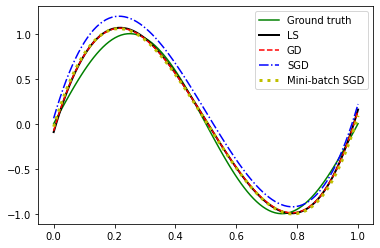

Test error (LS): 0.03892
Test error (GD): 0.03873
Test error (SGD): 0.05106
Test error (Mini-batch SGD): 0.03827


In [34]:
t_LS = predict(x_true, w_LS)
t_GD = predict(x_true, w_GD)
t_SGD = predict(x_true, w_SGD)
t_MB = predict(x_true, w_MB)

plt.plot(x_true, t_true, 'g-')
plt.plot(x_true, t_LS, 'k-', linewidth=2)
plt.plot(x_true, t_GD, 'r--')
plt.plot(x_true, t_SGD, 'b-.')
plt.plot(x_true, t_MB, 'y:', linewidth=3)
plt.legend(['Ground truth', 'LS', 'GD', 'SGD', 'Mini-batch SGD'])
plt.show()

E_LS_test = computeError(x_test, t_test, w_LS)
E_GD_test = computeError(x_test, t_test, w_GD)
E_SGD_test = computeError(x_test, t_test, w_SGD)
E_MB_test = computeError(x_test, t_test, w_MB)

print('Test error (LS): %0.5f' % E_LS_test)
print('Test error (GD): %0.5f' % E_GD_test)
print('Test error (SGD): %0.5f' % E_SGD_test)
print('Test error (Mini-batch SGD): %0.5f' % E_MB_test)